In [2]:
!pip install -r requirements.txt

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
!pip install -e .

Obtaining file:///tf/notebooks/EPT/1_taxonomist
  Attempting uninstall: taxonomist
    Found existing installation: taxonomist 0.0.3
    Can't uninstall 'taxonomist'. No files were found to uninstall.
  Running setup.py develop for taxonomist
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
#!python scripts/preprocessing/process_biodiscover.py \
#    --csv_path data/processed/EPT-14/EPT-14-DL-final.csv \
#    --out_folder data/processed/EPT-14

       Specimen ID Sample Name/Number  ...        Label_DNA read count_DNA
0            4_F12            4_F12_1  ...     Goera pilosa       215998.0
1            4_F12            4_F12_1  ...     Goera pilosa       215998.0
2            4_F12            4_F12_1  ...     Goera pilosa       215998.0
3            4_F12            4_F12_1  ...     Goera pilosa       215998.0
4            4_F12            4_F12_2  ...     Goera pilosa       215998.0
...            ...                ...  ...              ...            ...
146434      10_C11           10_C11_2  ...  Nemoura cinerea       314403.0
146435      10_C11           10_C11_2  ...  Nemoura cinerea       314403.0
146436      10_C11           10_C11_2  ...  Nemoura cinerea       314403.0
146437      10_C11           10_C11_2  ...  Nemoura cinerea       314403.0
146438      10_C11           10_C11_2  ...  Nemoura cinerea       314403.0

[146439 rows x 38 columns]
data/processed/EPT-14/01_EPT_processed.csv


In [1]:
import pandas as pd
df_csv = pd.read_csv('data/processed/EPT-14/EPT-14-DL-final.csv')
print(f"Number of classes: {len(df_csv['Species_DNA'].unique())}")
print(f"Number of specimen: {len(df_csv['Specimen ID'].unique())}")
print(f"Number of images: {len(df_csv)}")
for label in df_csv['Species_DNA'].unique():
    print(label)

Number of classes: 14
Number of specimen: 743
Number of images: 146439
Goera pilosa
Potamophylax rotundipennis
Baetis vernus
Baetis rhodani
Caenis horaria
Limnephilus lunatus
Halesus radiatus
Chaetopteryx villosa
Anabolia nervosa
Amphinemura standfussi
Ephemera danica
Athripsodes cinereus
Mystacides azureus
Nemoura cinerea


In [5]:
### Create train-test-splits. Splitting all individuals of the 14 species into 5 train-validiation-test splits.
#!python scripts/01_train_test_split.py \
#    --csv_path 'data/processed/EPT-14/01_EPT_processed.csv' \
#    --target_col 'Species_DNA' \
#    --group_col 'Specimen ID' \
#    --n_splits 5 \
#    --random_state 42 \
#    --out_folder 'data/processed/EPT-14' \
#    --shuffle 'False'

Target categorical, using StratifiedGroupKFold
data/processed/EPT-14/01_EPT_processed_5splits_Species_DNA.csv
                            train_0  val_0  ...  val_4_sp  test_4_s
Goera pilosa                   7344   1858  ...        19        24
Potamophylax rotundipennis     2579    640  ...        14        19
Baetis vernus                  1579    228  ...         2         2
Baetis rhodani                 5304   1279  ...         8         9
Caenis horaria                 4023    973  ...         4         4
Limnephilus lunatus           41324  10325  ...        37        46
Halesus radiatus               1260    286  ...         4         3
Chaetopteryx villosa           4685   1166  ...         8         9
Anabolia nervosa               1554    398  ...         3         4
Amphinemura standfussi         2385    420  ...         2         1
Ephemera danica               11588   2899  ...        12        17
Athripsodes cinereus           5811   1484  ...         4         6
Mystac

In [4]:
df = pd.read_csv('data/processed/EPT-14/01_EPT_processed_5splits_Species_DNA.csv')
print('Number of specimen used for Training: '+str(df['Specimen ID'].nunique()))
df.head()

Number of specimen used for Training: 743


,Specimen ID,Sample Name/Number,Species Name,Image File Name,Other Notes,Max Feret Diameter,Perimeter,Area,Holes,Area+Holes,...,Genus_DNA,Species_DNA,Label_DNA,read count_DNA,individual,0,1,2,3,4
0,4_F12,4_F12_1,PMR_ExStream22_Main_EPT,1_4_F12_1_2023_12_14-09-51-53-989.PNG,C25_T_mit,352,923,25295,19,25314,...,Goera,Goera pilosa,Goera pilosa,215998.0,4_F12,train,train,val,train,test
1,4_F12,4_F12_1,PMR_ExStream22_Main_EPT,2_4_F12_1_2023_12_14-09-51-54-000.PNG,C25_T_mit,367,1034,28245,168,28413,...,Goera,Goera pilosa,Goera pilosa,215998.0,4_F12,train,train,val,train,test
2,4_F12,4_F12_1,PMR_ExStream22_Main_EPT,1_4_F12_1_2023_12_14-09-51-54-013.PNG,C25_T_mit,400,1093,28301,21,28322,...,Goera,Goera pilosa,Goera pilosa,215998.0,4_F12,train,train,val,train,test
3,4_F12,4_F12_1,PMR_ExStream22_Main_EPT,2_4_F12_1_2023_12_14-09-51-54-025.PNG,C25_T_mit,380,999,29520,43,29563,...,Goera,Goera pilosa,Goera pilosa,215998.0,4_F12,train,train,val,train,test
4,4_F12,4_F12_2,PMR_ExStream22_Main_EPT,1_4_F12_2_2023_12_14-09-52-19-798.PNG,C25_T_mit,239,645,16395,1,16396,...,Goera,Goera pilosa,Goera pilosa,215998.0,4_F12,train,train,val,train,test


In [7]:
import os
import pandas as pd
# Function to check file existence
ref = pd.read_csv("data/processed/EPT-14/01_EPT_processed_5splits_Species_DNA.csv")
def is_file_valid(row):
    file_path = os.path.join('../10_images', row["Specimen ID"], row["Sample Name/Number"], row["Image File Name"])
    return os.path.exists(file_path)
# Apply the function to each row
ref["File Exists"] = ref.apply(is_file_valid, axis=1)

invalid_files_count = (~ref["File Exists"]).sum()

print(f"Number of invalid image files: {invalid_files_count}")
invalid_files_df = ref[~ref["File Exists"]]
invalid_files_df

Number of invalid image files: 27


,Specimen ID,Sample Name/Number,Species Name,Image File Name,Other Notes,Max Feret Diameter,Perimeter,Area,Holes,Area+Holes,...,Species_DNA,Label_DNA,read count_DNA,individual,0,1,2,3,4,File Exists
30101,9_G5,9_G5_2,PMR_ExStream22_Main_EPT,2_9_G5_2_2024_01_15-14-00-31-951.PNG,C60_T_mit,129,338,4266,2,4268,...,Goera pilosa,Goera pilosa,226877.0,9_G5,train,test,val,train,train,False
30102,9_G5,9_G5_2,PMR_ExStream22_Main_EPT,2_9_G5_2_2024_01_15-14-00-31-974.PNG,C60_T_mit,126,349,4554,6,4560,...,Goera pilosa,Goera pilosa,226877.0,9_G5,train,test,val,train,train,False
30103,9_G5,9_G5_2,PMR_ExStream22_Main_EPT,2_9_G5_2_2024_01_15-14-00-31-998.PNG,C60_T_mit,122,344,4768,0,4768,...,Goera pilosa,Goera pilosa,226877.0,9_G5,train,test,val,train,train,False
30104,9_G5,9_G5_2,PMR_ExStream22_Main_EPT,2_9_G5_2_2024_01_15-14-00-32-022.PNG,C60_T_mit,116,353,5015,0,5015,...,Goera pilosa,Goera pilosa,226877.0,9_G5,train,test,val,train,train,False
30105,9_G5,9_G5_2,PMR_ExStream22_Main_EPT,2_9_G5_2_2024_01_15-14-00-32-047.PNG,C60_T_mit,113,360,5399,0,5399,...,Goera pilosa,Goera pilosa,226877.0,9_G5,train,test,val,train,train,False
30106,9_G5,9_G5_2,PMR_ExStream22_Main_EPT,2_9_G5_2_2024_01_15-14-00-32-071.PNG,C60_T_mit,116,380,5819,1,5820,...,Goera pilosa,Goera pilosa,226877.0,9_G5,train,test,val,train,train,False
30107,9_G5,9_G5_2,PMR_ExStream22_Main_EPT,2_9_G5_2_2024_01_15-14-00-32-095.PNG,C60_T_mit,119,402,6114,0,6114,...,Goera pilosa,Goera pilosa,226877.0,9_G5,train,test,val,train,train,False
30108,9_G5,9_G5_2,PMR_ExStream22_Main_EPT,2_9_G5_2_2024_01_15-14-00-32-119.PNG,C60_T_mit,123,408,6315,0,6315,...,Goera pilosa,Goera pilosa,226877.0,9_G5,train,test,val,train,train,False
30109,9_G5,9_G5_2,PMR_ExStream22_Main_EPT,2_9_G5_2_2024_01_15-14-00-32-144.PNG,C60_T_mit,126,412,6367,0,6367,...,Goera pilosa,Goera pilosa,226877.0,9_G5,train,test,val,train,train,False
30110,9_G5,9_G5_2,PMR_ExStream22_Main_EPT,2_9_G5_2_2024_01_15-14-00-32-169.PNG,C60_T_mit,127,431,6386,0,6386,...,Goera pilosa,Goera pilosa,226877.0,9_G5,train,test,val,train,train,False


In [8]:
!python scripts/preprocessing/test_dataset_config.py \
    --data_folder "../10_images/" \
    --dataset_config "conf/user_datasets.py" \
    --dataset_name "biodiscover" \
    --csv_path "data/processed/EPT-14/01_EPT_processed_5splits_Species_DNA.csv" \
    --label "Species_DNA" \
    --fold 0

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/usr/local/lib/python3.8/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
train: found 94096 fpaths, 94096 labels
Examples:
[PosixPath('/tf/notebooks/EPT/10_images/4_F12/4_F12_1/1_4_F12_1_2023_12_14-09-51-53-989.PNG'), PosixPath('/tf/notebooks/EPT/10_images/4_F12/4_F12_1/2_4_F12_1_2023_12_14-09-51-54-000.PNG'), PosixPath('/tf/notebooks/EPT/10_images/4_F12/4_F12_1/1_4_F12_1_2023_12_14-09-51-54-013.PNG'), PosixPath('/tf/notebooks/EPT/10_images/4_F12/4_F12_1/2_4_F12_1_2023_12_14-09-51-54-025.PNG'), PosixPath('/tf/notebooks/EP

In [9]:
import wandb
wandb.login() #581221dff0063a897a4eff9d285fa871a2c8e7f2 (Philipp)

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: philipp-rehsen (uni-due). Use `wandb login --relogin` to force relogin


True

In [ ]:
# 01_ept-14-biomass was used to determine the learning rate for 'Log_weights'
# 02_ept-14-biomass was used to train for 100 epochs on 'Log_weights'
# 03_ept-14-biomass was used to pre-train for 100 epochs on 'Species_DNA', 'Genus_DNA', 'Familiy_DNA', 'Order_DNA'

# f'02_EPT-14-biomass-{label}-{model}' was used to pre-train for 100 epochs on 'Species_DNA', 'Genus_DNA', 'Familiy_DNA', 'Order_DNA' wit early stopping = True and 20 epochs patience

labels = ['Species_DNA', 'Genus_DNA', 'Family_DNA', 'Order_DNA']
models = ['efficientnet_b0'] # 'resnet18' can be added here

# Train biomass estimation on all 5 folds of previously created splits.
for model in models:
    for label in labels:
        if label == 'Species_DNA':
            classmap = 'data/processed/class_map_location_Species.txt'
        if label == 'Genus_DNA':
            classmap = 'data/processed/class_map_location_Genus.txt'
        if label == 'Family_DNA':
            classmap = 'data/processed/class_map_location_Family.txt'
        if label == 'Order_DNA':
            classmap = 'data/processed/class_map_location_Order.txt'
        for fold in range(5):
            !python scripts/02_train.py \
                --data_folder "../10_images/" \
                --dataset_config "conf/user_datasets.py" \
                --dataset_name "biodiscover" \
                --csv_path "data/processed/EPT-14/01_EPT_processed_5splits_Species_DNA.csv" \
                --label {label} \
                --fold {fold} \
                --class_map {classmap} \
                --imsize 224 \
                --batch_size 256 \
                --aug 'trivialaugment' \
                --load_to_memory 'False' \
                --model {model} \
                --opt 'adamw' \
                --max_epochs 100 \
                --min_epochs 0 \
                --early_stopping 'True' \
                --early_stopping_patience 50 \
                --criterion 'cross-entropy' \
                --lr 0.0001 \
                --auto_lr 'False' \
                --log_dir 'V1-EPT-14' \
                --out_folder 'outputs' \
                --out_prefix f'V1-EPT-14-{label}' \
                --deterministic 'True' \
                --precision '16-mixed'

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/usr/local/lib/python3.8/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
Seed set to 42
Using early stopping with patience 50
None
wandb: Currently logged in as: philipp-rehsen (uni-due). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.5
wandb: Run data is saved locally in ./wandb/run-20241120_110119-241120-1101-592f
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run fV1-EPT-14-Species_DNA_efficientnet_b0_f0_241120-1101-592f
wandb: ⭐️ View project at https://wandb.a

Epoch 4: 100%|████████████████████| 368/368 [02:04<00:00,  2.95it/s, v_num=592f]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Epoch 5: 100%|████████████████████| 368/368 [02:05<00:00,  2.93it/s, v_num=592f]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  74%|█████████████▎    | 67/91 [00:08<00:03,  7.73it/s]


Epoch 6: 100%|████████████████████| 368/368 [02:04<00:00,  2.96it/s, v_num=592f]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Epoch 7: 100%|████████████████████| 368/368 [02:05<00:00,  2.94it/s, v_num=592f]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  78%|██████████████    | 71/91 [00:09<00:02,  7.63it/s]


Epoch 8: 100%|████████████████████| 368/368 [02:05<00:00,  2.93it/s, v_num=592f]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  95%|█████████████████ | 86/91 [00:11<00:00,  7.66it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Epoch 30: 100%|███████████████████| 368/368 [02:04<00:00,  2.95it/s, v_num=592f]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Epoch 31: 100%|███████████████████| 368/368 [02:05<00:00,  2.94it/s, v_num=592f]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   7%|█▎                 | 6/91 [00:00<00:09,  8.98it/s]


Epoch 32: 100%|███████████████████| 368/368 [02:04<00:00,  2.95it/s, v_num=592f]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Epoch 33: 100%|███████████████████| 368/368 [02:05<00:00,  2.93it/s, v_num=592f]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  11%|█▉                | 10/91 [00:01<00:10,  7.46it/s]


Epoch 34: 100%|███████████████████| 368/368 [02:05<00:00,  2.94it/s, v_num=592f]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Epoch 35: 100%|███████████████████| 368/368 [02:05<00:00,  2.94it/s, v_num=592f]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  15%|██▊               | 14/91 [00:01<00:09,  7.86it/s]


Epoch 36:  14%|██▉                 | 53/368 [00:19<01:55,  2.72it/s, v_num=592f]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 4: 100%|████████████████████| 367/367 [02:04<00:00,  2.95it/s, v_num=ea8c]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Epoch 5: 100%|████████████████████| 367/367 [02:04<00:00,  2.95it/s, v_num=ea8c]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|                           | 0/91 [00:00<?, ?it/s]


Epoch 6: 100%|████████████████████| 367/367 [02:03<00:00,  2.96it/s, v_num=ea8c]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Epoch 7: 100%|████████████████████| 367/367 [02:04<00:00,  2.95it/s, v_num=ea8c]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   4%|▊                  | 4/91 [00:00<00:11,  7.58it/s]


Epoch 8: 100%|████████████████████| 367/367 [02:04<00:00,  2.95it/s, v_num=ea8c]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Epoch 9: 100%|████████████████████| 367/367 [02:04<00:00,  2.95it/s, v_num=ea8c]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   9%|█▋                 | 8/91 [00:00<00:10,  8.06it/s]


Epoch 10: 100%|███████████████████| 367/367 [02:04<00:00,  2.95it/s, v_num=ea8c]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Epoch 11: 100%|███████████████████| 367/367 [02:04<00:00,  2.94it/s, v_num=ea8c]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  13%|██▎               | 12/91 [00:01<00:11,  6.64it/s]


Epoch 12: 100%|███████████████████| 367/367 [02:04<00:00,  2.96it/s, v_num=ea8c]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Epoch 13: 100%|███████████████████| 367/367 [02:04<00:00,  2.95it/s, v_num=ea8c]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  18%|███▏              | 16/91 [00:02<00:09,  7.74it/s]


Epoch 14: 100%|███████████████████| 367/367 [02:04<00:00,  2.95it/s, v_num=ea8c]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Epoch 15: 100%|███████████████████| 367/367 [02:04<00:00,  2.95it/s, v_num=ea8c]
Validation: |                                             | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  22%|███▉              | 20/91 [00:02<00:09,  7.85it/s]


Epoch 16:  90%|█████████████████  | 329/367 [01:52<00:12,  2.93it/s, v_num=ea8c]

In [1]:
import os
import glob

def list_files_with_prefix(directory, prefix):
    # Define the pattern for the files to search
    pattern = os.path.join(directory, f"{prefix}*")
    
    # Use glob to find files matching the pattern
    files = glob.glob(pattern)
    
    return files

def list_ckpts(fold_directory):
    # Define the pattern for the files to search    
    pattern = os.path.join(fold_directory, '*.ckpt')
    
    # Use glob to find files matching the pattern, with recursive search
    ckpt_files = glob.glob(pattern)
    
    filtered_files = [f for f in ckpt_files if not f.endswith('_last.ckpt')]     # Filter out files ending with '_last.ckpt'
    
    # Return the first file from the filtered list or None if the list is empty
    return filtered_files

def extend_fold_dict(directory):
    for subfolder in directory:
        folds = [f.path for f in os.scandir(subfolder) if f.is_dir()]
        for fold in folds:
            fold_dict[int(fold[-1])].extend(list_ckpts(fold))
        
directory = 'outputs/biodiscover/'
prefix = 'fV1-EPT-14'

    
fold_dict={}
for number in range(0,5):
    fold_dict[number] = []

# List the files
setting_folders = list_files_with_prefix(directory, prefix)

extend_fold_dict(setting_folders)

ValueError: invalid literal for int() with base 10: 's'

In [ ]:
for fold, ls in fold_dict.items():
    for file in ls:
        if 'Species_DNA' in file:
            label = 'Species_DNA'
            classmap = 'data/processed/class_map_location_Species.txt'
        if 'Genus_DNA' in file:
            label = 'Genus_DNA'
            classmap = 'data/processed/class_map_location_Genus.txt'
        if 'Family_DNA' in file:
            label = 'Family_DNA'
            classmap = 'data/processed/class_map_location_Family.txt'
        if 'Order_DNA' in file:
            label = 'Order_DNA'
            classmap = 'data/processed/class_map_location_Order.txt'
        # Automatic predictiongs using the first (best) model checkpoint in the directory.
        !python scripts/03_predict.py \
            --data_folder "../10_images/" \
            --dataset_config "conf/user_datasets.py" \
            --dataset_name "biodiscover" \
            --csv_path "data/processed/EPT-14/01_EPT_processed_5splits_Species_DNA.csv" \
            --label {label} \
            --fold {fold} \
            --class_map {classmap} \
            --imsize 224 \
            --batch_size 256 \
            --aug 'none' \
            --out_folder 'outputs' \
            --tta 'False' \
            --out_prefix 'fV1-EPT-14' \
            --ckpt_path {file}

In [13]:
import os
import glob

directory = 'outputs/biodiscover/'
prefix = 'fV1-EPT-14'

def list_files_with_prefix(directory, prefix):
    pattern = os.path.join(directory, f"{prefix}*")
    files = glob.glob(pattern)
    
    return files

def list_csvs(directory): 
    pattern = os.path.join(directory, 'predictions', 'biodiscover_none', '*.csv')
    csv_files = glob.glob(pattern)
    csv_files = [f for f in csv_files]
    return csv_files

def extend_run_dict_csv(directory):
    folds = [f.path for f in os.scandir(directory) if f.is_dir()]
    for fold in folds:
        run_dict_csv[directory].extend(list_csvs(fold))

        
        
run_dict_csv={}
for run in list_files_with_prefix(directory, prefix):
    run_dict_csv[run] = []
    
setting_folders = list_files_with_prefix(directory, prefix)

for key, value in run_dict_csv.items():
    extend_run_dict_csv(key)

In [14]:
run_dict_csv

{'outputs/biodiscover/fV1-EPT-14-Family_DNA_efficientnet_b0': ['outputs/biodiscover/fV1-EPT-14-Family_DNA_efficientnet_b0/f0/predictions/biodiscover_none/fV1-EPT-14_fV1-EPT-14-Family_DNA_efficientnet_b0_f0_241202-0953-608e_epoch05_val-loss0.45_none.csv',
  'outputs/biodiscover/fV1-EPT-14-Family_DNA_efficientnet_b0/f0/predictions/biodiscover_none/fV1-EPT-14_fV1-EPT-14-Family_DNA_efficientnet_b0_f0_241121-0653-d6ec_epoch07_val-loss0.38_none.csv',
  'outputs/biodiscover/fV1-EPT-14-Family_DNA_efficientnet_b0/f1/predictions/biodiscover_none/fV1-EPT-14_fV1-EPT-14-Family_DNA_efficientnet_b0_f1_241121-0908-2d9f_epoch01_val-loss0.32_none.csv',
  'outputs/biodiscover/fV1-EPT-14-Family_DNA_efficientnet_b0/f1/predictions/biodiscover_none/fV1-EPT-14_fV1-EPT-14-Family_DNA_efficientnet_b0_f1_241202-1047-5446_epoch03_val-loss0.49_none.csv',
  'outputs/biodiscover/fV1-EPT-14-Family_DNA_efficientnet_b0/f3/predictions/biodiscover_none/fV1-EPT-14_fV1-EPT-14-Family_DNA_efficientnet_b0_f3_241202-1234-c90e_e

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
def confusion_matrixX(y_true, 
                      y_pred, 
                      classes, 
                      figsize=(15,15), 
                      fonts=(18,10,18), 
                      rotate=False,
                      grid=False,
                      normalize='true'):

    # Check the inputs
    s_true = set(np.unique(y_true))
    s_pred = set(np.unique(y_pred))

    if classes == 'union':
        classes = sorted(list(s_true | s_pred))

    if len((s_true | s_pred) - set(classes)) > 0:
        warnings.warn(f"The inputs contain classes not present in the class list: {(s_true | s_pred) - set(classes)}")

    cm = confusion_matrix(y_true, 
                          y_pred, 
                          labels=classes,
                          normalize=normalize)
    
    if normalize:
        cm = cm*100
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(cm)
    mask[cm==0] = 1
    sns.heatmap(cm, 
                annot=True, 
                annot_kws={"size": fonts[0]},
                fmt='.0f', 
                cmap="YlGnBu",
                xticklabels=classes, 
                yticklabels=classes,
                mask=mask,
                square=True, 
                cbar=False,
                ax=ax)
    
    if grid:
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')

    ax.set_ylabel('True label', size=fonts[2])
    ax.set_xlabel('Predicted label', size=fonts[2])
    ax.yaxis.set_ticks_position('none') 
    ax.xaxis.set_ticks_position('none') 
    
    if rotate:
        if isinstance(rotate, list):
            rot_x = rotate[0]
            rot_y = rotate[1]
        else:
            rot_x = rot_y = rotate
        plt.setp(ax.get_yticklabels(), rotation=rot_x, ha="right", rotation_mode="anchor", size=fonts[1])
        plt.setp(ax.get_xticklabels(), rotation=rot_y, ha="right", rotation_mode="anchor", size=fonts[1])
    else:
        plt.setp(ax.get_yticklabels(), size=fonts[1])
        plt.setp(ax.get_xticklabels(), size=fonts[1])
    plt.show()
        
from sklearn.metrics import classification_report
def classification_reportX(*args, 
                           figsize=None, 
                           fonts=(12,10,10),
                           rotate=True, 
                           bbox_anchor=(1.15,0.8), 
                           **kwargs):
    """Extends classification report by adding an useful plot for the performance across classes"""
    r = classification_report(*args, **kwargs, output_dict=True)
    rdf0 = pd.DataFrame(r)
    rdf = rdf0.T.iloc[:-3,:].sort_values('support',ascending=False)
    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()

    xbar = range(len(rdf))
    ax1.bar(xbar,rdf['support'], alpha=0.2)
    ax2.plot(rdf['f1-score'], 'ro', label='f1-score')
    ax2.plot(rdf['precision'], 'g*', label='precision', alpha=0.5)
    ax2.plot(rdf['recall'], 'b*', label='recall', alpha=0.5)

    ax2.vlines(xbar, rdf['f1-score'], rdf['precision'], 'g')
    ax2.vlines(xbar, rdf['f1-score'], rdf['recall'], 'b')

    ax2.hlines(rdf0['weighted avg']['f1-score'], 0,len(rdf), color='r', linestyle='--', label='weighted f1-score')
    ax2.hlines(rdf0['macro avg']['f1-score'], 0,len(rdf), color='r', linestyle='-.', label='macro f1-score')
    ax2.hlines(rdf0['accuracy']['recall'], 0,len(rdf), color='b', linestyle='--', label='accuracy')
    
    if rotate:
        plt.setp(ax1.get_xticklabels(), 
                 rotation=45, 
                 ha="right", 
                 rotation_mode="anchor",
                 size=fonts[1])

    fig.legend(bbox_to_anchor=bbox_anchor,
               prop={"size": fonts[2]})
    
    ax2.set_ylabel("Score", size=fonts[0])
    ax1.set_ylabel("Support", size=fonts[0])
    plt.setp(ax1.get_yticklabels(),
             size=fonts[0])
    plt.setp(ax2.get_yticklabels(),
             size=fonts[0])
    
    return classification_report(*args, **kwargs)

joining outputs/biodiscover/fV1-EPT-14-Family_DNA_efficientnet_b0


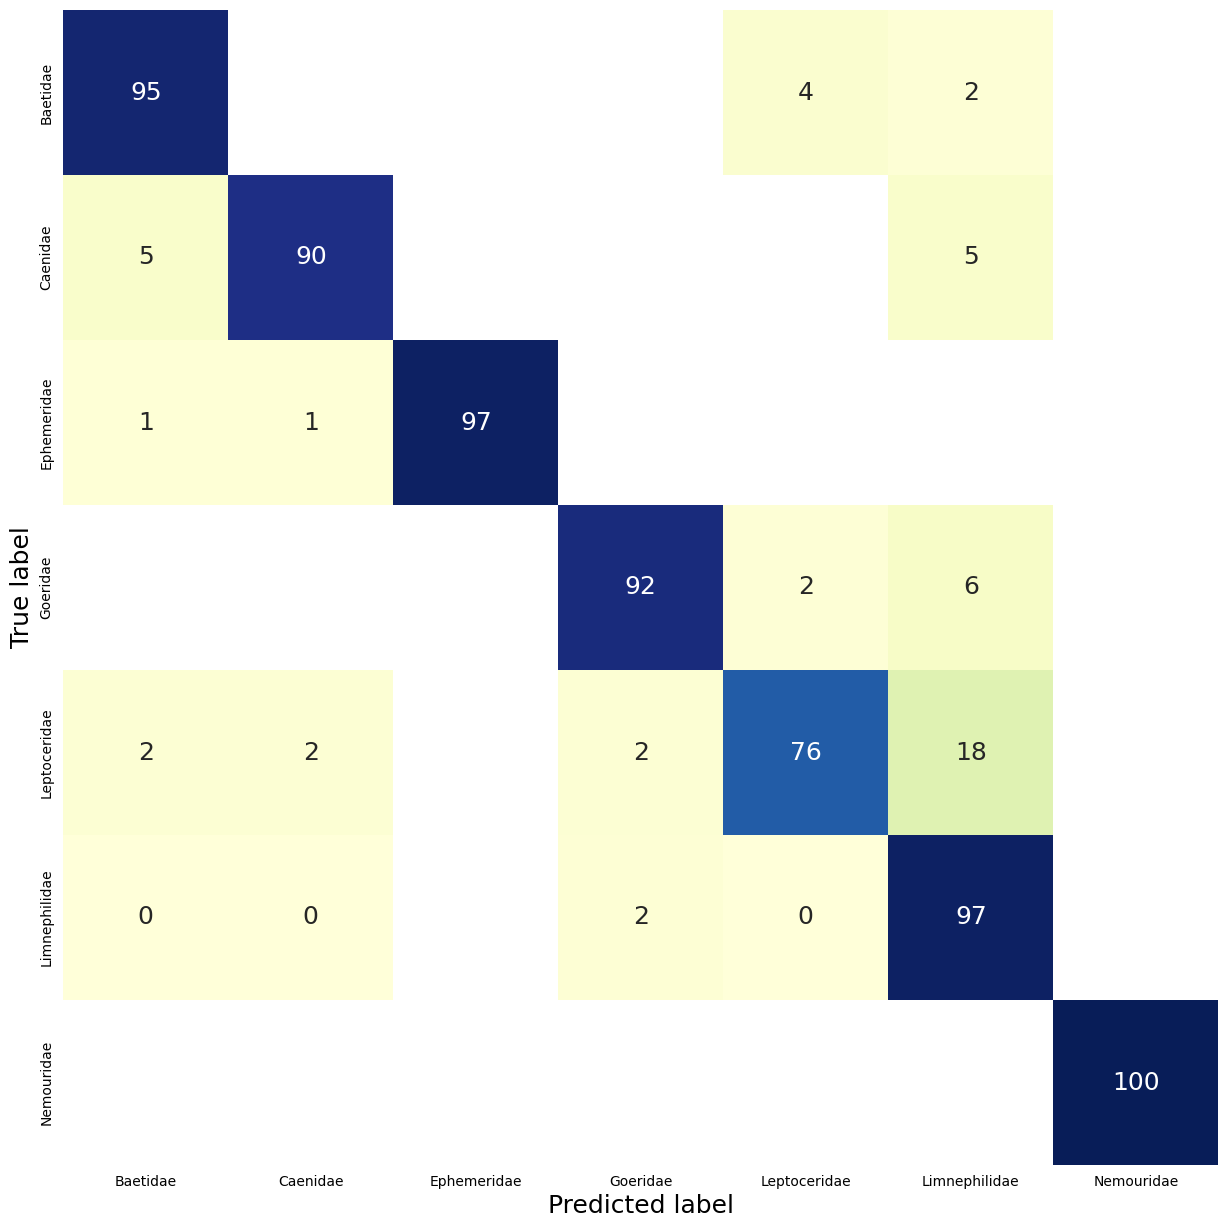

joining outputs/biodiscover/fV1-EPT-14-Genus_DNA_efficientnet_b0


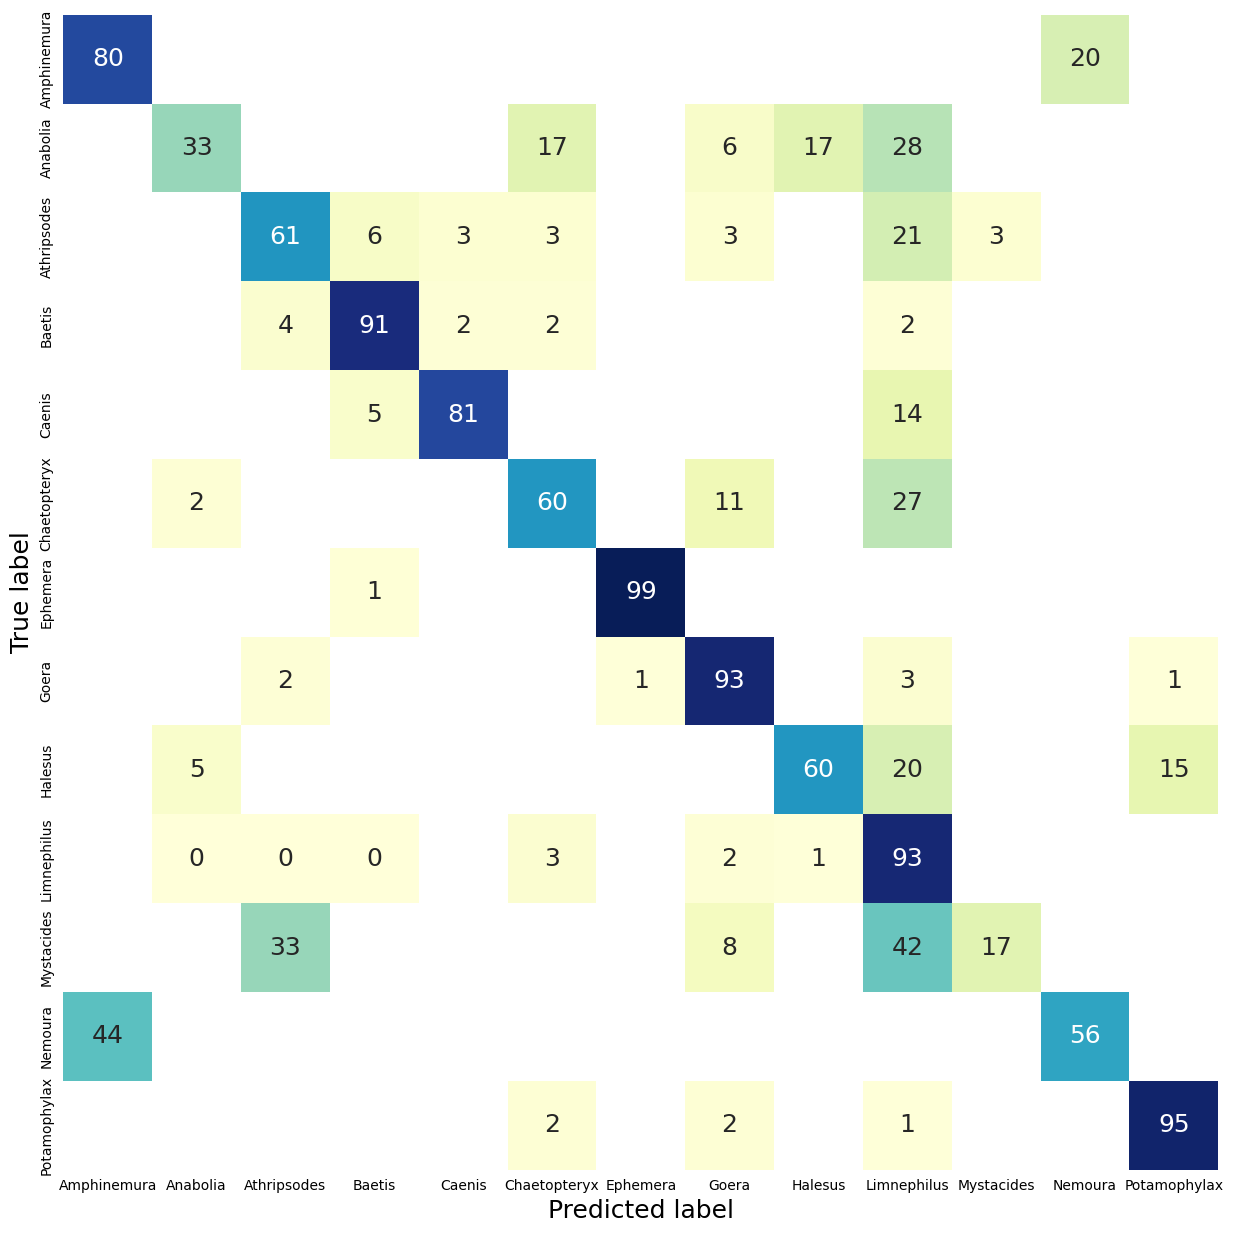

joining outputs/biodiscover/fV1-EPT-14-Order_DNA_efficientnet_b0


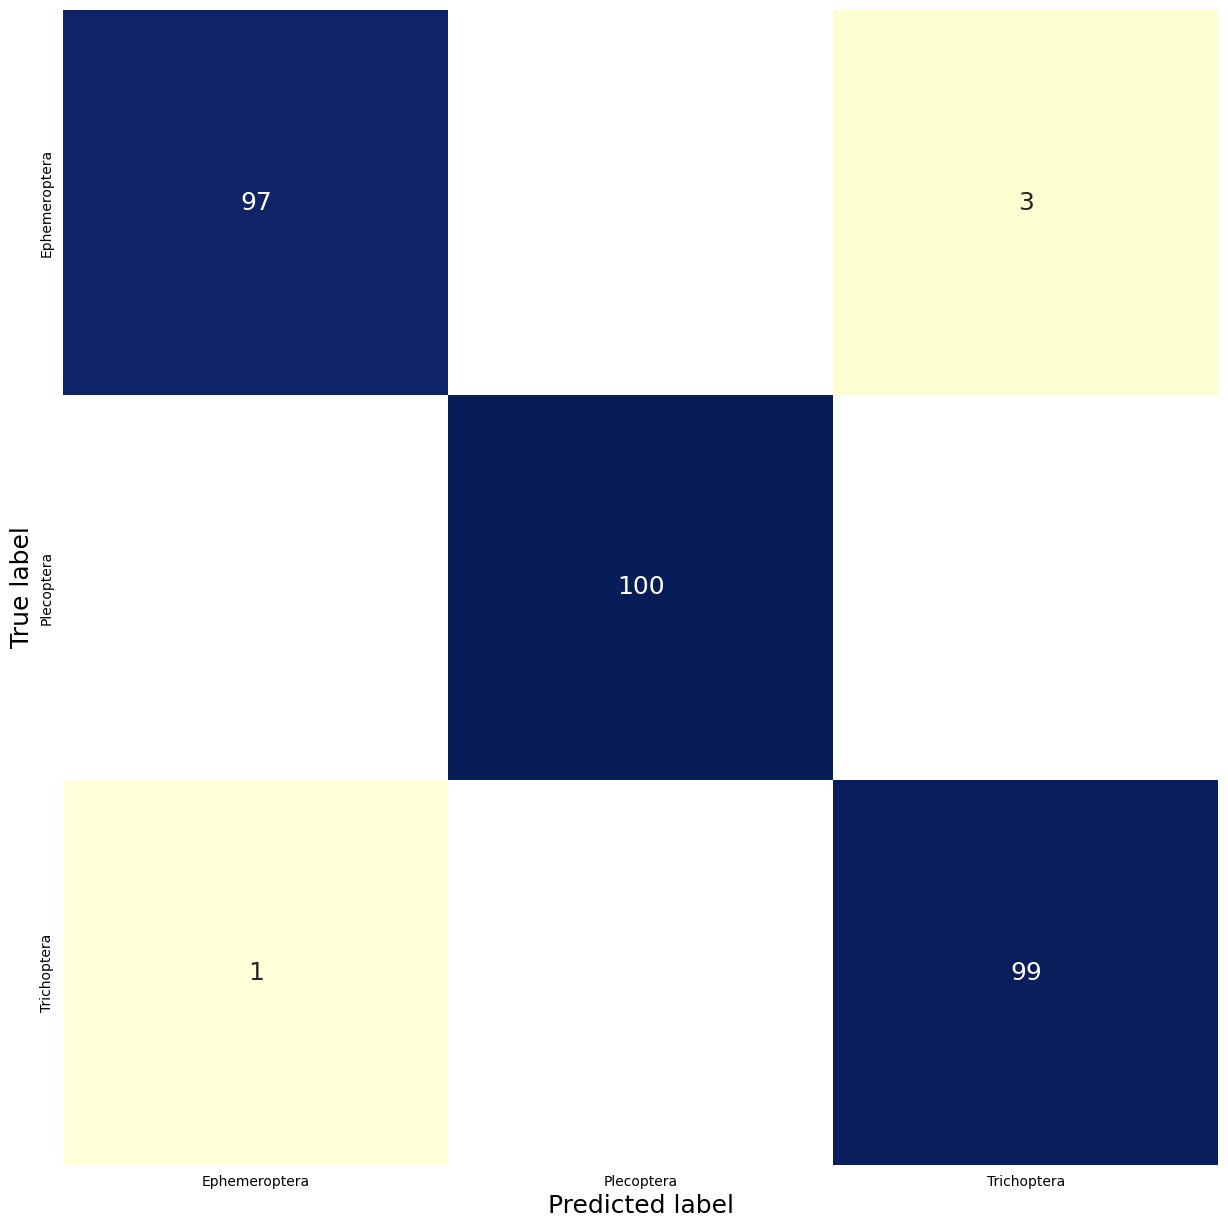

joining outputs/biodiscover/fV1-EPT-14-Species_DNA_efficientnet_b0


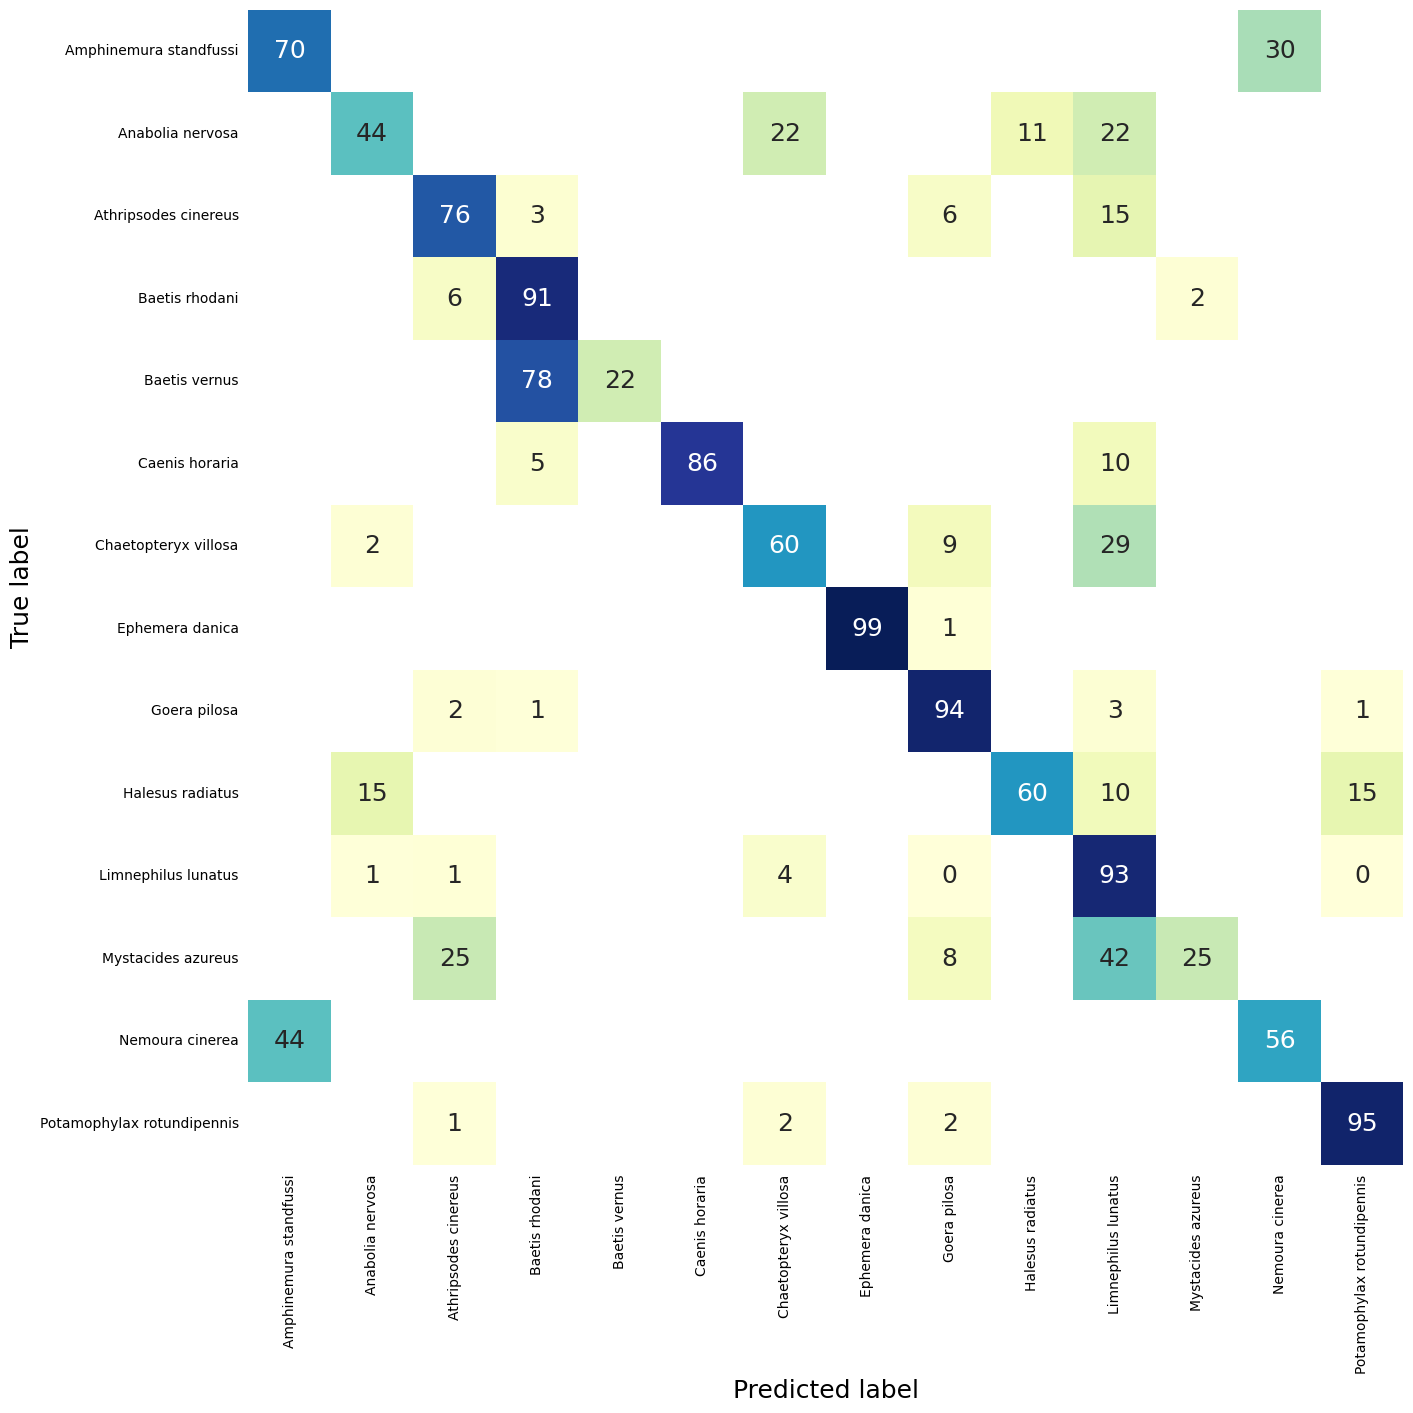

In [15]:
import pandas as pd
from pathlib import Path

ref = pd.read_csv("data/processed/EPT-14/01_EPT_processed_5splits_Species_DNA.csv")

for run, fold_ls in run_dict_csv.items():
    print('joining '+ run)
    df_f0 = pd.read_csv(fold_ls[0])
    df_f1 = pd.read_csv(fold_ls[1])
    df_f2 = pd.read_csv(fold_ls[2])
    df_f3 = pd.read_csv(fold_ls[3])
    df_f4 = pd.read_csv(fold_ls[4])
    df = pd.concat([df_f0, df_f1, df_f2, df_f3, df_f4])
    
    # Get just the filename from the full path
    df["fname"] = df["fname"].apply(lambda x: Path(x).name)
    preds = df[["fname", "y_pred"]].set_index("fname")
    
    # Join the dataframes. 'inner' to keep only the rows that are in both dataframes
    results_df = ref.join(preds, how="inner", on="Image File Name")  
    
    # Choose wanted columns
    if 'Species_DNA' in run:
        label = 'Species_DNA'
    if 'Genus_DNA' in run:
        label = 'Genus_DNA'
    if 'Family_DNA' in run:
        label = 'Family_DNA'
    if 'Order_DNA' in run:
        label = 'Order_DNA'
    results_df = results_df[[label, "y_pred", "individual"]]
    
    # Grouped by individual
    results_df_grouped = results_df.groupby(["individual"]).agg(lambda x: pd.Series.mode(x)[0])
    results_df_grouped.to_csv(os.path.join(run, run.split('/')[-1]+'_grouped_predictions.csv'))
    
    with open(os.path.join(run, run.split('/')[-1]+'_classification_report.txt'), 'w') as f:
        print(classification_reportX(results_df_grouped[label],
                                     results_df_grouped["y_pred"],
                                     zero_division=0,
                                     bbox_anchor=(1.3,0.8)), file=f)
    plt.tight_layout()
    plt.savefig(os.path.join(run, run.split('/')[-1]+'_report.png'))
    plt.close()
    
    confusion_matrixX(results_df_grouped[label], results_df_grouped["y_pred"], classes='union')
    plt.tight_layout()
    plt.savefig(os.path.join(run, run.split('/')[-1]+'conf_matrix.png'))
    plt.close()

In [ ]:
import pandas as pd
confusion_df = pd.read_csv('outputs/biodiscover/02_ept-14-biomass_efficientnet_b0/01_EPT_processed_5splits_Species_DNA_grouped_predictions.csv')

confusion_matrixX(confusion_df['y_true'], confusion_df['y_pred'], 'union')

In [36]:
results_df.groupby(["individual"]).agg(lambda x: pd.Series.mode(x)[0])

,Genus_DNA,y_pred
individual,,
10_A11,Goera,Goera
10_A2,Baetis,Baetis
10_A7,Limnephilus,Limnephilus
10_B7,Limnephilus,Limnephilus
10_C10,Baetis,Baetis
...,...,...
9_H3,Potamophylax,Potamophylax
9_H6,Athripsodes,Baetis
9_H7,Limnephilus,Limnephilus


In [17]:
results_df['individual'].nunique()

743